# Objective :

To predict whether or not a patient will survive after 5 year based upon the patient age, year of traetment and number of positive lymph nodes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
heberman= pd.read_csv("haberman.csv", header= None, 
                      names= ['age', 'operation_year', 'positive_lymph_nodes', 'survival_status_after_5_years'])
heberman.head()

,age,operation_year,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
print(heberman.shape)

(306, 4)


In [4]:
heberman['survival_status_after_5_years'].value_counts()

1    225
2     81
Name: survival_status_after_5_years, dtype: int64

In [5]:
print(heberman.iloc[:,-1].value_counts(normalize = True))

1    0.735294
2    0.264706
Name: survival_status_after_5_years, dtype: float64


- We can observe that our tatget model is imbalanced as it contains 73%(225/306) values 'yes' and only 27%(81/306) values 'no'.
- Our dataset contains a small number of records(306).

In [6]:
heberman['survival_status_after_5_years'].unique()


array([1, 2], dtype=int64)

In [7]:
heberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
operation_year                   306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


- We can see that there is no missing values in the dataset. So, there is no need of data imputation.
- As, this is a classification problem. So, we have to change the datatype into categoriacal datatype of the column 'survival_status_after_5_years'.
- Let's map our values of 'survial_status_after_5_years' column into 'yes'(Survied) and 'no'(not survived).


In [8]:
heberman['survival_status_after_5_years']= heberman['survival_status_after_5_years'].map({1: 'yes', 2: 'no'})

In [9]:
heberman['survival_status_after_5_years']= heberman['survival_status_after_5_years'].astype('category')
heberman.head(10)

,age,operation_year,positive_lymph_nodes,survival_status_after_5_years
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
5,33,58,10,yes
6,33,60,0,yes
7,34,59,0,no
8,34,66,9,no
9,34,58,30,yes


# Let's get a deeper insight:

In [10]:
heberman.describe()

,age,operation_year,positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


# Observations:

- Patients age vary from 30 to 83.
- Nearly 25% patient have no positive lymph nodes.
- Max. positive lymph nodes observed is 52.
- Def: If lymph nodes have some cancer cells in them, they are called positive.
- 75% patients have less than 5 positive lymph nodes.

In [11]:
sns.set_style('whitegrid')

# 1- D scatter plot:

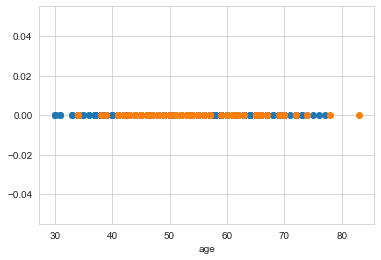

In [12]:
one= heberman.loc[heberman['survival_status_after_5_years']== 'yes']
two= heberman.loc[heberman['survival_status_after_5_years']== 'no']
plt.plot(one['age'], np.zeros_like(one['age']), 'o', label= "survival_status_after_5_years, yes")
plt.plot(two['age'], np.zeros_like(two['age']), 'o', label= "survival_status_after_5_years, no")
plt.xlabel('age')
plt.show()


# Observation:

- persons age between 41-70, tends to very less survive.

# 2-D scatter plot:

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


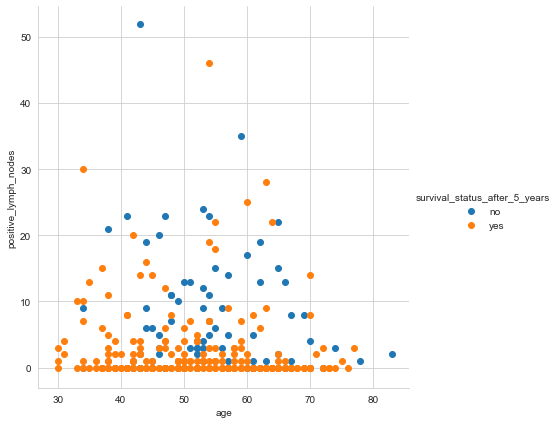

In [13]:
sns.FacetGrid(heberman, hue= 'survival_status_after_5_years', size= 6).map(plt.scatter,'age','positive_lymph_nodes').add_legend()

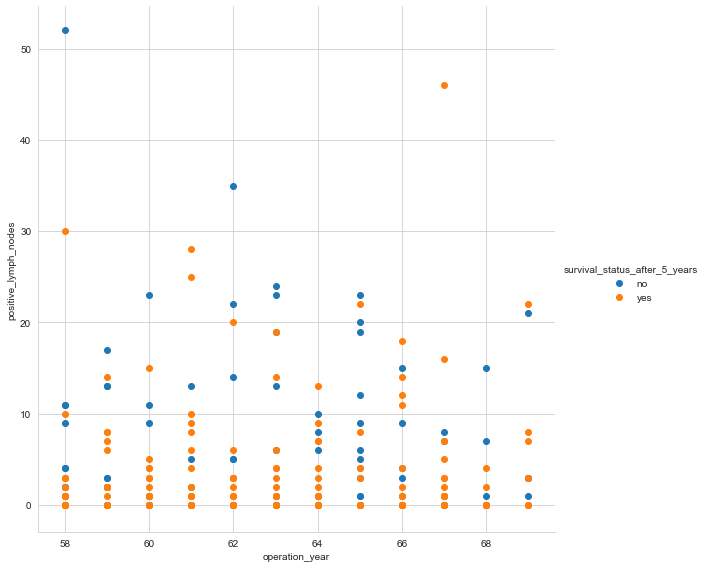

In [14]:
sns.FacetGrid(heberman, hue= 'survival_status_after_5_years', height= 8).map(plt.scatter,'operation_year','positive_lymph_nodes').add_legend()

# Univariate Analysis:(Histogram, PDF, CDF)
- Histograms and Probability Density Functions (PDF) using KDE
- pdf stands for probability density function.
- cdf stands for cummulative density function.We can visually see what percentage of patient have positive lymph nodes less than 5.

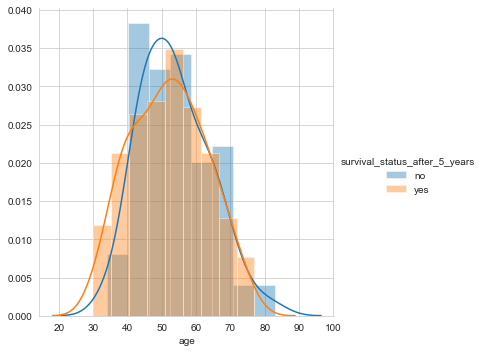

In [15]:
sns.FacetGrid(heberman, hue= 'survival_status_after_5_years', height= 5).map(sns.distplot,'age').add_legend()

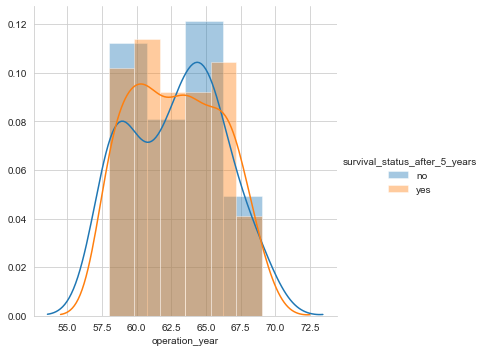

In [16]:
sns.FacetGrid(heberman, hue= 'survival_status_after_5_years', height= 5).map(sns.distplot,'operation_year').add_legend()

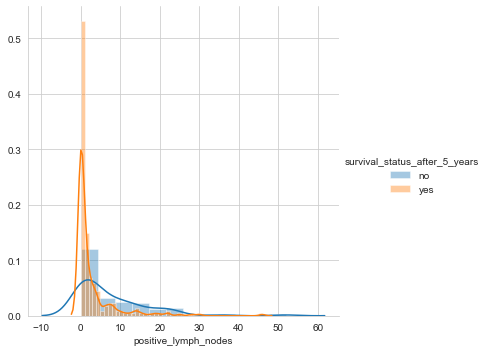

In [17]:
sns.FacetGrid(heberman, hue= 'survival_status_after_5_years', height= 5).map(sns.distplot,'positive_lymph_nodes').add_legend()


[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


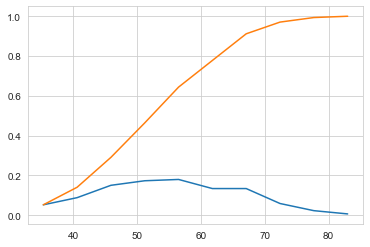

In [18]:
# pdf&cdf
counts, bin_edges= np.histogram(heberman['age'], bins= 10, density= True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


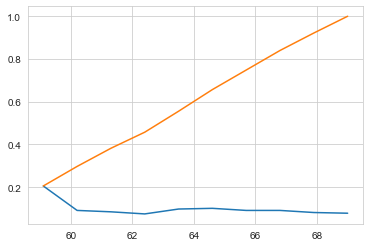

In [19]:
# pdf&cdf
counts, bin_edges= np.histogram(heberman['operation_year'], bins= 10, density= True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


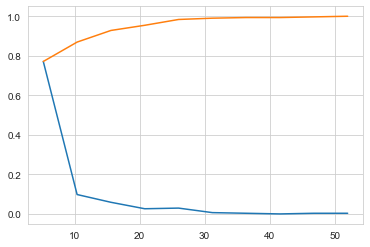

In [20]:
# pdf&cdf
counts, bin_edges= np.histogram(heberman['positive_lymph_nodes'], bins= 10, density= True)
pdf= counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

# Pair plot:(Multivariate analysis)


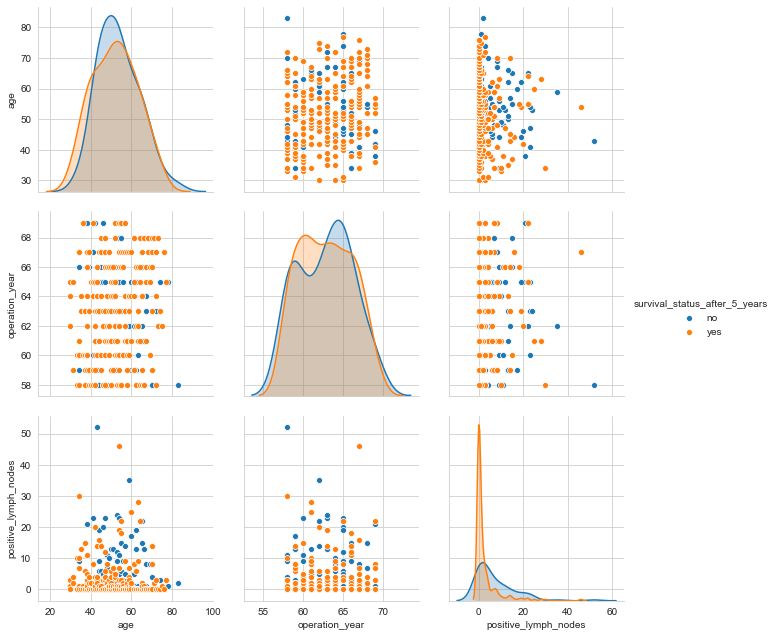

In [21]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
sns.pairplot(heberman, hue= 'survival_status_after_5_years', height= 3)
plt.show()


# Observation:

- we can see better sepration between two classes using year and positive_lymph_nodes.

# Mean, Variance and Std-dev:


In [22]:
print("Means:")
print(np.mean(heberman['positive_lymph_nodes']))

print("\nStd dev.:")
print(np.std(heberman['positive_lymph_nodes']))

print("\nVariance:")
print(np.var(heberman['positive_lymph_nodes']))

Means:
4.026143790849673

Std dev.:
7.177896092811152

Variance:
51.52219231919361


# Median, Percentile, Quantile, IQR, MAD

In [23]:
print("Median:")
print(np.median(heberman['positive_lymph_nodes']))

print('\nQuantile:')
print(np.percentile(heberman['positive_lymph_nodes'], np.arange(0, 101, 25)))

#90th percentile
print("\nPercentile:")
print(np.percentile(heberman['positive_lymph_nodes'],80))

from statsmodels import robust
print("\nMedian absolute deviation:")
print(robust.mad(heberman['positive_lymph_nodes']))

Median:
1.0

Quantile:
[ 0.  0.  1.  4. 52.]

Percentile:
7.0

Median absolute deviation:
1.482602218505602


# Observations:

- we can see that mostly positive lymph nodes are in 4th quantile.


# Box plot


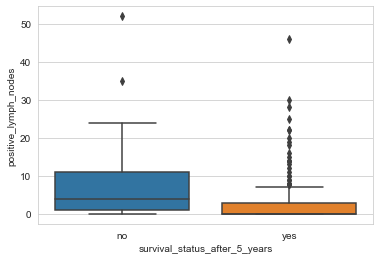

In [24]:
#Q1- (25th percentile)
#Q2- (50th percentile or median)
#Q3- (75th percentile)
#Q4-  (100th percentile)
#Inter Quartile Range = Q3 -Q1
#whisker len- 1.5*iqr
sns.boxplot(x= 'survival_status_after_5_years', y= 'positive_lymph_nodes', data= heberman)

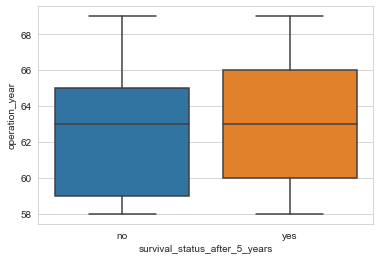

In [25]:
sns.boxplot(x= 'survival_status_after_5_years', y= 'operation_year', data= heberman)

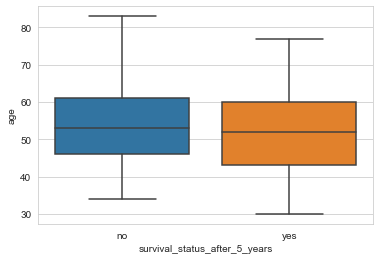

In [26]:
sns.boxplot(x= 'survival_status_after_5_years', y= 'age', data= heberman)

# Observation:

- The patients who have positive_lymph_nodes less then 5, tends to survive.
- Almost 80% of the patients have less than or equal to 7 positive_lymph_nodes.

# Violin plots:

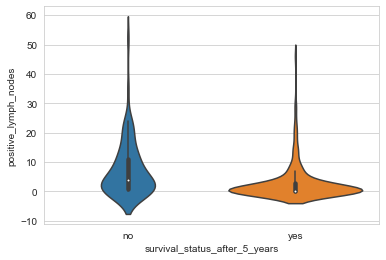

In [27]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="survival_status_after_5_years", y="positive_lymph_nodes", data=heberman, size=8)
plt.show()

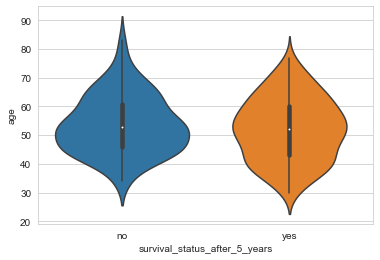

In [28]:
sns.violinplot(x="survival_status_after_5_years", y="age", data=heberman, size=8)
plt.show()

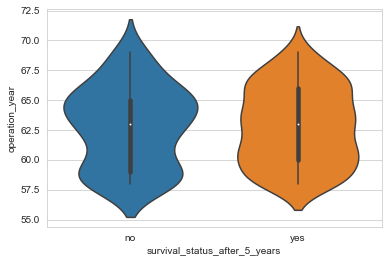

In [29]:
sns.violinplot(x="survival_status_after_5_years", y="operation_year", data=heberman, size=8)
plt.show()

# Observatin:

- The patients treated after 1966 have the slighlty higher chance to surive that the rest. The patients treated before 1958 have the slighlty lower chance to surive that the rest.